In [2]:
import pandas as pd

df = pd.read_csv(r"C:\Users\ashwi\Downloads\titanic\train.csv")
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
df.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [11]:
df['Age'].fillna(df['Age'].median(), inplace=True)


C:\Users\ashwi\AppData\Local\Temp\ipykernel_14396\286566303.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


In [12]:
df['Age'].isnull().sum()


np.int64(0)

In [15]:
df['Embarked'].mode()

0    S
Name: Embarked, dtype: object

In [16]:
df['Embarked'].fillna('S', inplace=True)


In [17]:
df['Embarked'].isnull().sum()


np.int64(0)

Matplotlib is building the font cache; this may take a moment.


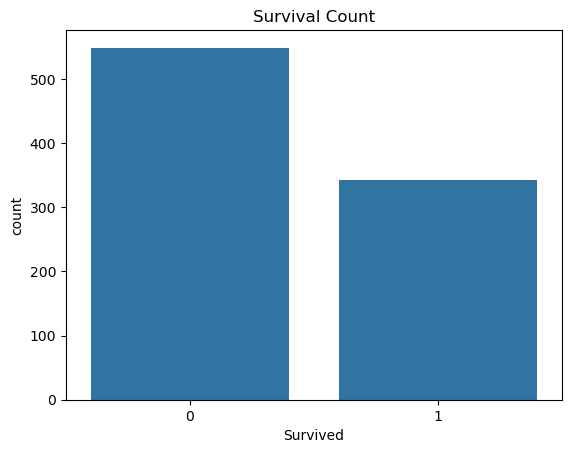

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Survived', data=df)
plt.title("Survival Count")
plt.show()


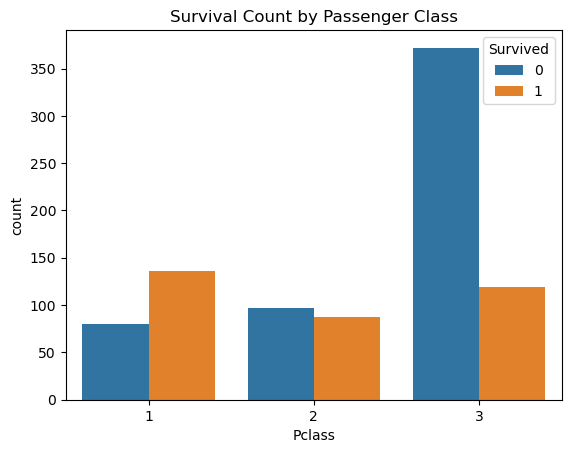

In [19]:
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title("Survival Count by Passenger Class")
plt.show()


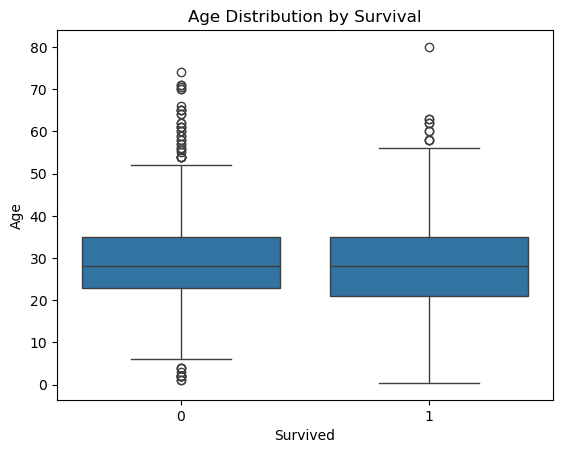

In [20]:
sns.boxplot(x='Survived', y='Age', data=df)
plt.title("Age Distribution by Survival")
plt.show()


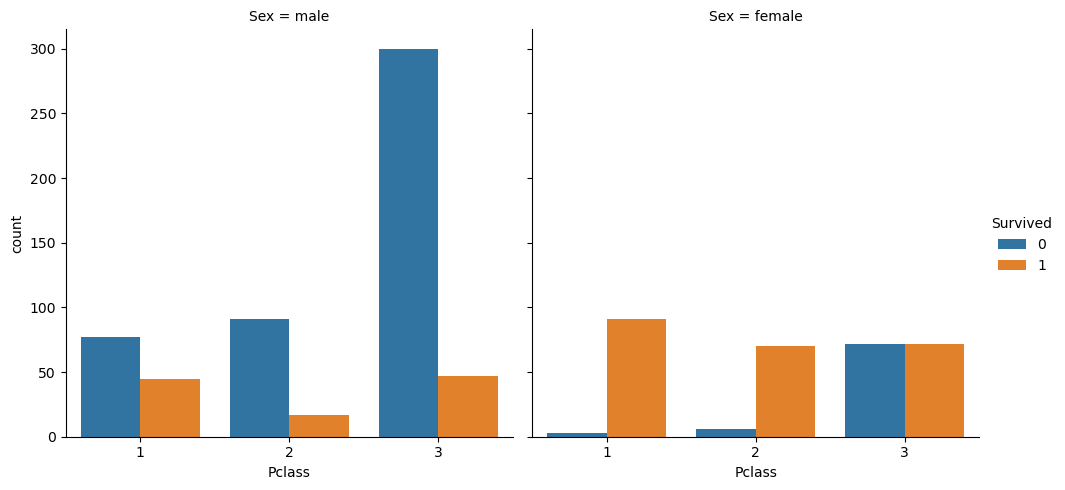

In [21]:
sns.catplot(x='Pclass', hue='Survived', col='Sex', kind='count', data=df)


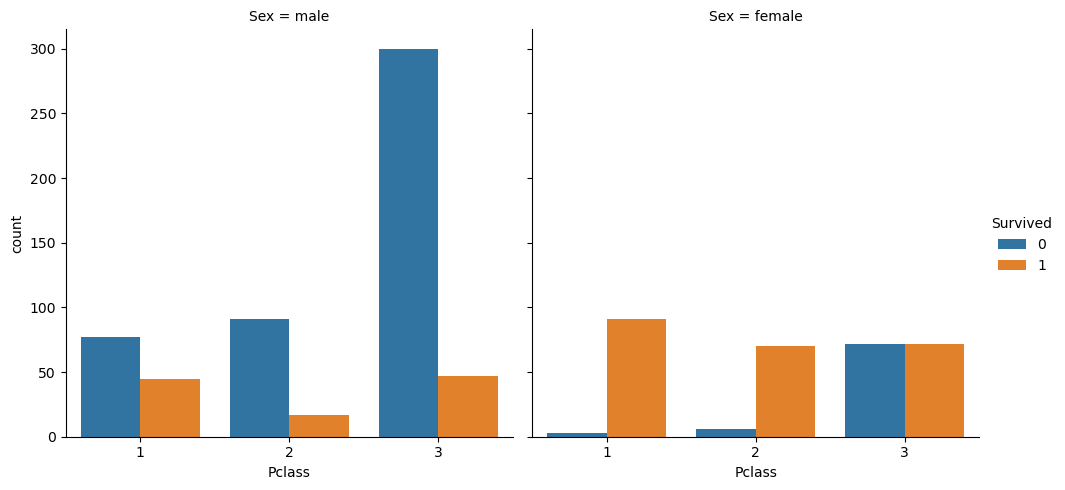

In [22]:
sns.catplot(x='Pclass', hue='Survived', col='Sex', kind='count', data=df)
plt.show()


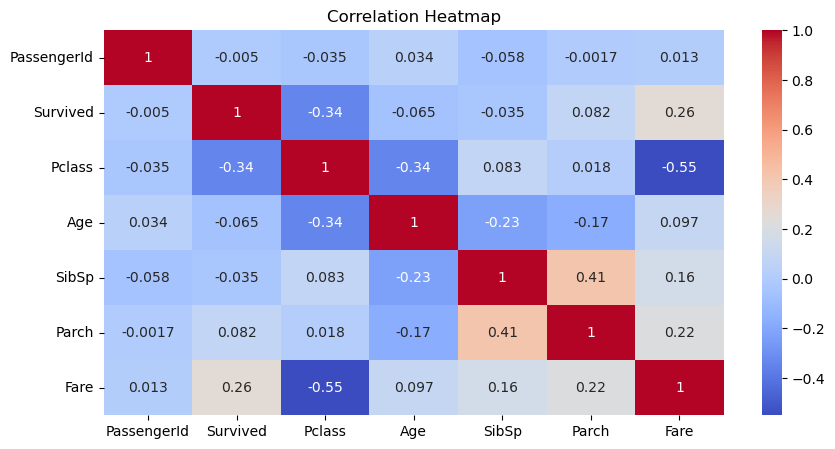

In [24]:
plt.figure(figsize=(10,5))
numeric_df = df.select_dtypes(include=['int64', 'float64'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()



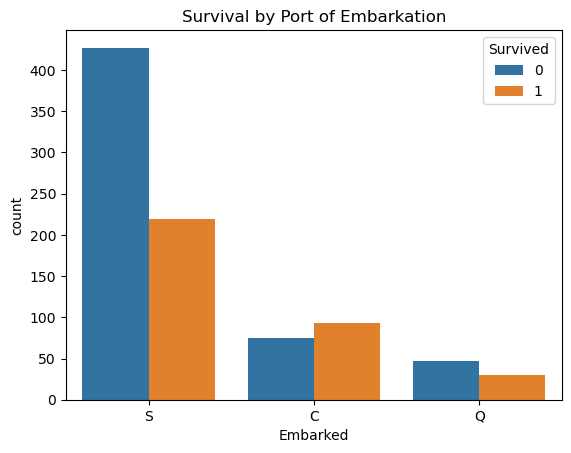

In [25]:
sns.countplot(x='Embarked', hue='Survived', data=df)
plt.title("Survival by Port of Embarkation")
plt.show()


In [26]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1


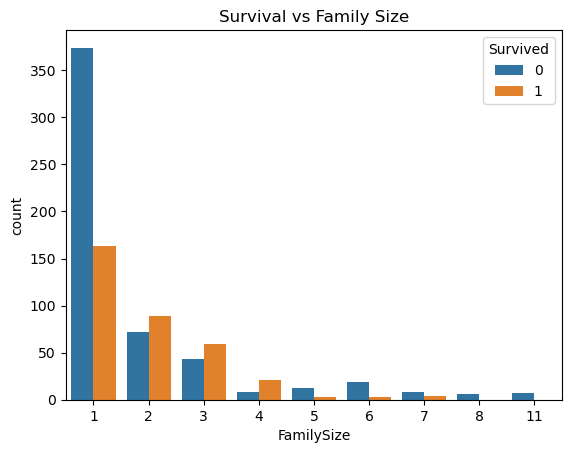

In [27]:
sns.countplot(x='FamilySize', hue='Survived', data=df)
plt.title("Survival vs Family Size")
plt.show()


In [30]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})



In [31]:
df.to_csv("cleaned_titanic.csv", index=False)


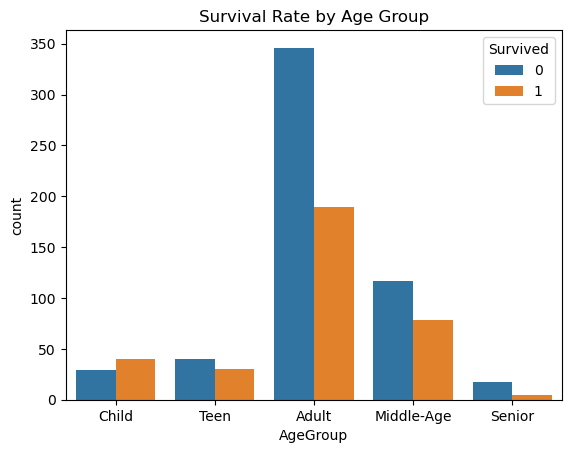

In [32]:
df['AgeGroup'] = pd.cut(df['Age'], bins=[0,12,18,35,60,100], 
                        labels=['Child','Teen','Adult','Middle-Age','Senior'])

sns.countplot(x='AgeGroup', hue='Survived', data=df)
plt.title("Survival Rate by Age Group")
plt.show()


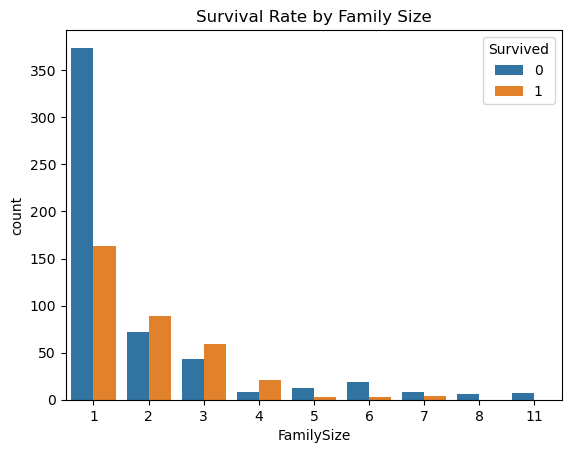

In [33]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
sns.countplot(x='FamilySize', hue='Survived', data=df)
plt.title("Survival Rate by Family Size")
plt.show()


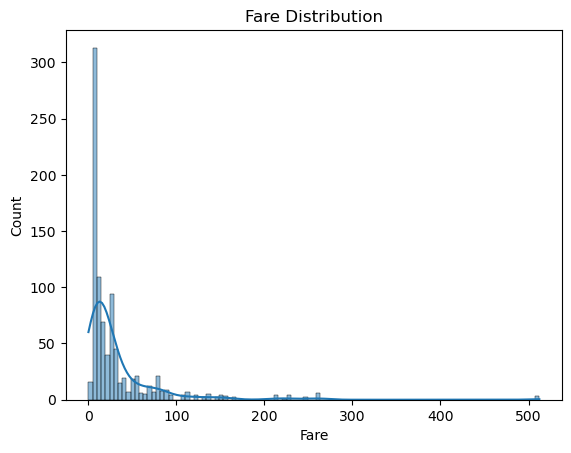

In [34]:
sns.histplot(df['Fare'], kde=True)
plt.title("Fare Distribution")
plt.show()


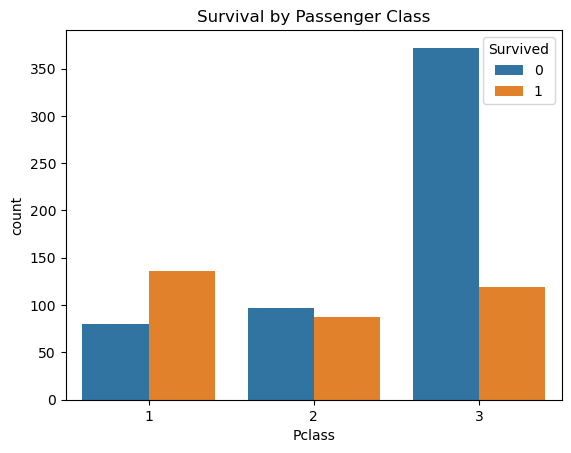

In [44]:
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title("Survival by Passenger Class")
plt.show()


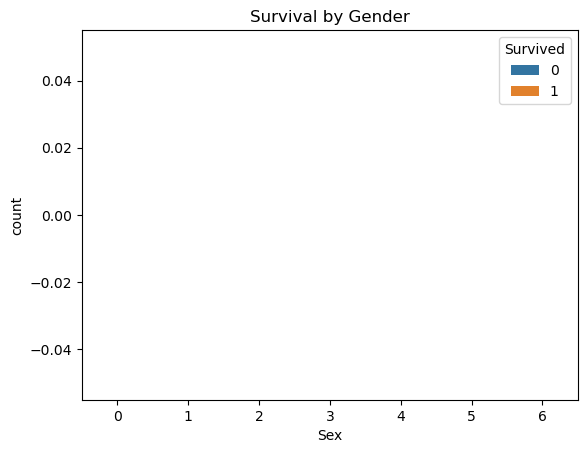

In [45]:
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title("Survival by Gender")
plt.show()


In [47]:
def extract_gender(name):
    name = name.lower()
    if "mr." in name:
        return "male"
    if "mrs." in name or "miss." in name or "ms." in name or "mme." in name or "mlle." in name:
        return "female"
    return "female"  # default (rare cases in Titanic)

df['Sex'] = df['Name'].apply(extract_gender)



In [48]:
df['Sex'].unique()


array(['male', 'female'], dtype=object)

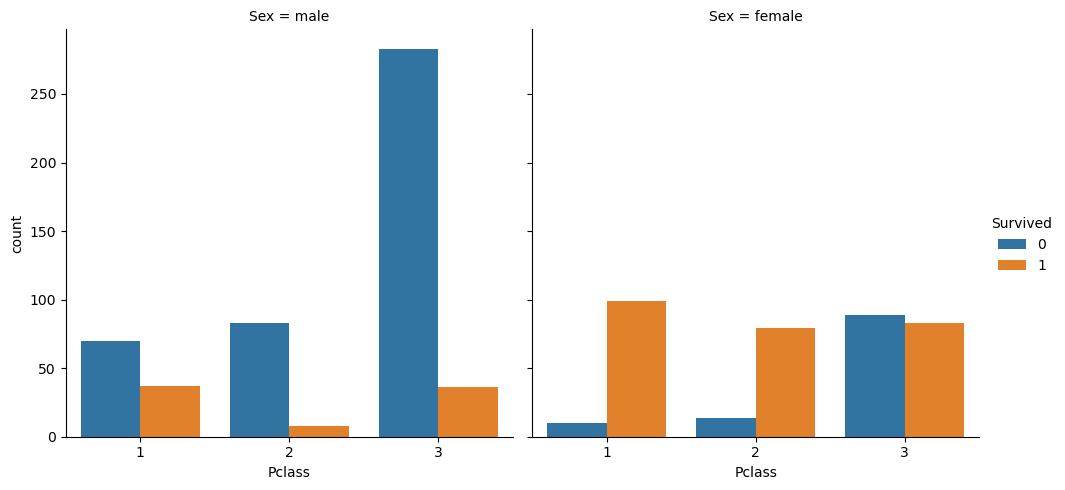

In [49]:
sns.catplot(
    data=df,
    x="Pclass",
    hue="Survived",
    col="Sex",
    kind="count"
)
plt.show()


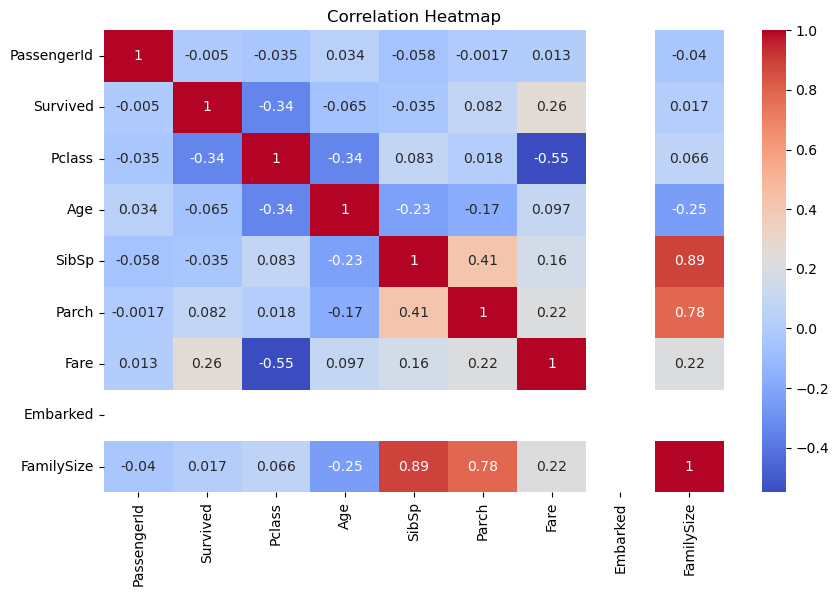

In [50]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [53]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['Sex'] = le.fit_transform(df['Sex'])        
df['Embarked'] = df['Embarked'].fillna('S')    
df['Embarked'] = le.fit_transform(df['Embarked'])

df['AgeGroup'] = le.fit_transform(df['AgeGroup'])


In [54]:
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 
            'Embarked', 'FamilySize', 'AgeGroup']

X = df[features]
y = df['Survived']


In [55]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [56]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [57]:
y_pred = model.predict(X_test)


In [58]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)


Accuracy: 0.8044692737430168
Confusion Matrix:
 [[88 17]
 [18 56]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.84      0.83       105
           1       0.77      0.76      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.80      0.80      0.80       179



In [61]:
from sklearn.preprocessing import StandardScaler 

scaler = StandardScaler()
numeric_cols = ['Age','Fare', 'FamilySize', 'SibSp', 'Parch']

X[numeric_cols] = scaler.fit_transform(X[numeric_cols])
X[numeric_cols].head()

C:\Users\ashwi\AppData\Local\Temp\ipykernel_14396\1216965815.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[numeric_cols] = scaler.fit_transform(X[numeric_cols])


,Age,Fare,FamilySize,SibSp,Parch
0,-0.565736,-0.502445,0.059160,0.432793,-0.473674
1,0.663861,0.786845,0.059160,0.432793,-0.473674
2,-0.258337,-0.488854,-0.560975,-0.474545,-0.473674
3,0.433312,0.420730,0.059160,0.432793,-0.473674
4,0.433312,-0.486337,-0.560975,-0.474545,-0.473674


In [68]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=200, random_state=42)

rf.fit(X_train, y_train)

rf_pred = rf.predict(X_test)
from sklearn.metrics import accuracy_score

rf_accuracy = accuracy_score(y_test, rf_pred)
print("Random Forest Accuracy:", rf_accuracy)

Random Forest Accuracy: 0.7932960893854749


In [69]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

dt_pred = dt.predict(X_test)

from sklearn.metrics import accuracy_score
dt_accuracy = accuracy_score(y_test, dt_pred)
print("Decision Tree Accuracy:", dt_accuracy)

Decision Tree Accuracy: 0.770949720670391


In [70]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

knn_pred = knn.predict(X_test)

knn_accuracy = accuracy_score(y_test, knn_pred)
print("KNN Accuracy:", knn_accuracy)

KNN Accuracy: 0.7150837988826816


In [71]:
print("\nMODEL ACCURACY COMPARISON")
print("Logistic Regression:", accuracy)
print("Random Forest:", rf_accuracy)
print("Decision Tree:", dt_accuracy)
print("KNN:", knn_accuracy)


MODEL ACCURACY COMPARISON
Logistic Regression: 0.8044692737430168
Random Forest: 0.7932960893854749
Decision Tree: 0.770949720670391
KNN: 0.7150837988826816


In [72]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [5, 10, 15, None],
    "min_samples_split": [2, 5, 10]
}

grid = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best Accuracy:", grid.best_score_)

Best Parameters: {'max_depth': 5, 'min_samples_split': 10, 'n_estimators': 300}
Best Accuracy: 0.8300009849305624


In [73]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(RandomForestClassifier(random_state=42), X, y, cv=10)

print("Cross Validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

Cross Validation Scores: [0.73333333 0.80898876 0.73033708 0.82022472 0.82022472 0.79775281
 0.86516854 0.7752809  0.82022472 0.76404494]
Mean CV Accuracy: 0.7935580524344569


In [74]:
accuracies = {
    "Logistic Regression": accuracy,
    "Random Forest": rf_accuracy,
    "Decision Tree": dt_accuracy,
    "KNN": knn_accuracy,
    "Tuned Random Forest": grid.best_score_
}

best_model = max(accuracies, key=accuracies.get)
print("\nBest Model:", best_model)
print("Best Accuracy:", accuracies[best_model])


Best Model: Tuned Random Forest
Best Accuracy: 0.8300009849305624


In [75]:
import pickle

pickle.dump(grid.best_estimator_, open("final_model.pkl", "wb"))
print("Model saved as final_model.pkl")

Model saved as final_model.pkl


In [78]:
def get_age_group(age):
    if age <= 12:
        return 0
    elif age <= 18:
        return 1
    elif age <= 50:
        return 2
    else:
        return 3

new_passenger = {
    "Pclass": 3,
    "Sex": 0,
    "Age": 25,
    "SibSp": 0,
    "Parch": 0,
    "Fare": 7.25,
    "Embarked": 1,
    "FamilySize": 1,
    "AgeGroup": get_age_group(25)   # ← FIXED
}

person = pd.DataFrame([new_passenger])


person[numeric_cols] = scaler.transform(person[numeric_cols])

prediction = grid.best_estimator_.predict(person)
print("Survived (1=yes, 0=no):", prediction[0])

Survived (1=yes, 0=no): 1
